<a href="https://colab.research.google.com/github/Priyo-prog/Deep-Learning-with-Tensorflow/blob/main/Computer%20Vision%20and%20Convolutional%20Neural%20Network%20in%20Tensorflow/CNN_Summary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CNN Summary**

## Import Libraries

In [44]:
import zipfile
import os


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import random
from pathlib import Path

## Get The Data

In [45]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2024-08-26 03:37:47--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.153.207, 142.250.145.207, 74.125.128.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.153.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.3’

pizza_steak.zip.3   100%[===================>] 104.47M  31.9MB/s    in 3.3s    

2024-08-26 03:37:51 (31.9 MB/s) - ‘pizza_steak.zip.3’ saved [109540975/109540975]



## Inspect The Data

In [46]:
!ls pizza_steak

test  train


In [47]:
!ls pizza_steak/train

pizza  steak


In [48]:
!ls pizza_steak/train/pizza

1008104.jpg  1572608.jpg  2097315.jpg  2572958.jpg  3084957.jpg  3693710.jpg  668944.jpg
1008144.jpg  1573562.jpg  2098014.jpg  2574896.jpg  3102271.jpg  3699992.jpg  670201.jpg
1008844.jpg  1576248.jpg  2104569.jpg  2576168.jpg  3105724.jpg  3702863.jpg  674188.jpg
1008941.jpg  1577871.jpg  2110257.jpg  2577373.jpg  3109486.jpg  3703769.jpg  676432.jpg
1011404.jpg  1584379.jpg  2112757.jpg  2577377.jpg  312479.jpg	 3704879.jpg  682201.jpg
102037.jpg   1593665.jpg  2121603.jpg  2581276.jpg  3128495.jpg  3705479.jpg  68684.jpg
1026922.jpg  1593835.jpg  2126352.jpg  2584745.jpg  3148119.jpg  370643.jpg   698251.jpg
1029698.jpg  1600705.jpg  2126709.jpg  2587918.jpg  3164761.jpg  3712344.jpg  702165.jpg
1033251.jpg  1608000.jpg  2135635.jpg  2587921.jpg  3168266.jpg  3713343.jpg  704161.jpg
1035854.jpg  1617418.jpg  2137341.jpg  259449.jpg   3170114.jpg  372275.jpg   709273.jpg
1038357.jpg  1620560.jpg  2142812.jpg  2602611.jpg  3173779.jpg  3742272.jpg  709947.jpg
1040878.jpg  1620761.jp

In [49]:
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 2 directories and 0 images in pizza_steak.
There are 2 directories and 0 images in pizza_steak/train.
There are 0 directories and 750 images in pizza_steak/train/pizza.
There are 0 directories and 750 images in pizza_steak/train/steak.
There are 2 directories and 0 images in pizza_steak/test.
There are 0 directories and 250 images in pizza_steak/test/pizza.
There are 0 directories and 250 images in pizza_steak/test/steak.


## Get The Class Names

In [50]:
current_directory = Path().absolute()
current_directory

PosixPath('/content')

In [51]:
data_directory = current_directory/"pizza_steak/train"
data_directory

PosixPath('/content/pizza_steak/train')

## Visualize The Images

In [52]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir+target_class

  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)

  # mpgimg.imread() does not read PosixPath
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off")

  print(f"Image Shape {img.shape}")
  return img

['1839025.jpg']
Image Shape (512, 512, 3)


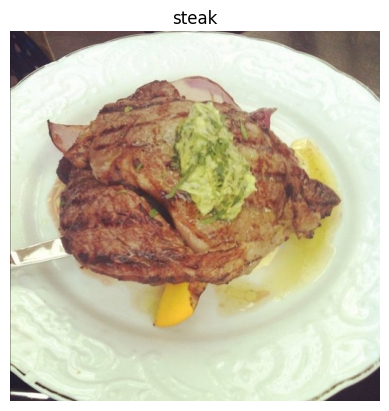

In [53]:
# View random image
img = view_random_image(target_dir="pizza_steak/train/",
                  target_class="steak")

## Get The Train and Test Directory

In [54]:
train_dir = "/content/pizza_steak/train"
test_dir = "pizza_steak/test"

##  Augmented Data

Data augmentation is a process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar. All these can be done without collecting more data

In [55]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.0)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [56]:
# Import Data and augment it for training directory
print("Augmented Training Data : ")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224,224),
                                                                   batch_size=32,
                                                                   class_mode="binary",
                                                                   shuffle=False)

# Create non-augmented data batches
print("Non-augmented training data :")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create non-augmented test data batches
print("Non-augmented test data : ")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary")

Augmented Training Data : 
Found 1500 images belonging to 2 classes.
Non-augmented training data :
Found 1500 images belonging to 2 classes.
Non-augmented test data : 
Found 500 images belonging to 2 classes.


## Visualize Augmented Data

In [57]:
images, labels = next(train_data)
augmented_images, augmented_labels = next(train_data_augmented)

Show Image Number : 11


(-0.5, 223.5, 223.5, -0.5)

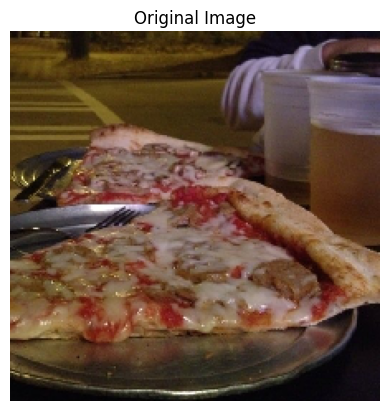

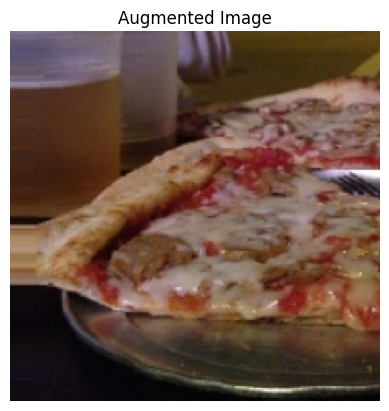

In [58]:
import random
random_number = random.randint(0,31)
print(f"Show Image Number : {random_number}")
plt.imshow(images[random_number])
plt.title("Original Image")
plt.axis(False)
plt.figure()

plt.imshow(augmented_images[random_number])
plt.title("Augmented Image")
plt.axis(False)

## Create The CNN Model

In [70]:
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=10,
           kernel_size=3,
           activation=tf.keras.activations.relu,
           input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10,3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the CNN model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# 3. Create the learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

steps_per_epoch = train_data_augmented.samples // train_data_augmented.batch_size
validation_steps = test_data.samples // test_data.batch_size

find_lr_history = model.fit(train_data_augmented,
                            epochs=6,
                            steps_per_epoch=steps_per_epoch,
                            validation_data=test_data,
                            validation_steps=validation_steps,
                            callbacks=[lr_scheduler])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 24s 396ms/step - accuracy: 0.5280 - loss: 3.8586 - val_accuracy: 0.5104 - val_loss: 0.6833 - learning_rate: 0.0010
Epoch 2/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.3546 - val_accuracy: 0.6500 - val_loss: 0.6027 - learning_rate: 0.0011
Epoch 3/6


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


46/46 ━━━━━━━━━━━━━━━━━━━━ 39s 380ms/step - accuracy: 0.5746 - loss: 0.6863 - val_accuracy: 0.7917 - val_loss: 0.5374 - learning_rate: 0.0013
Epoch 4/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 836us/step - accuracy: 0.7812 - loss: 0.5967 - val_accuracy: 0.9000 - val_loss: 0.5249 - learning_rate: 0.0014
Epoch 5/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 22s 406ms/step - accuracy: 0.6317 - loss: 0.6357 - val_accuracy: 0.7917 - val_loss: 0.5440 - learning_rate: 0.0016
Epoch 6/6
46/46 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - accuracy: 0.7188 - loss: 0.5351 - val_accuracy: 0.7000 - val_loss: 0.5908 - learning_rate: 0.0018
